In [12]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
print(tf.__version__)


2.13.1


In [7]:
#load the fashion data 
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 2s 0us/step


In [8]:
#create a validation set 
#since neural network will be trained with gradient descent we must scale the input data DOWN to 0's and 1's
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train =y_train_full[:5000], y_train_full[5000:]


In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

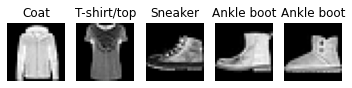

In [37]:

#display some clothing items 
sample_image = class_names[y_train[0]]
plt.figure()
num_items = 5
for i in range(num_items):
    plt.subplot(1,num_items, i+1)    
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(f"{class_names[y_train[i]]}") 
    plt.axis('off')


In [38]:
#building the network
#Sequential API
model = keras.models.Sequential()

#keras.layers.InputLayer(input_shape=[28,28])

model = keras.models.Sequential([
#Flatten, converts each image into a 1-D array 
keras.layers.Flatten(input_shape=[28, 28]),

#Computation of weight matrices! 
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),

#Output layer using softmax 
keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(
    loss = keras.losses.sparse_categorical_crossentropy,
    optimizer = keras.optimizers.SGD(), 
    metrics = ["accuracy"]
)

In [47]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2238 - accuracy: 0.9197 - val_loss: 0.3011 - val_accuracy: 0.8906
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2207 - accuracy: 0.9209 - val_loss: 0.2883 - val_accuracy: 0.8918
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2164 - accuracy: 0.9223 - val_loss: 0.3053 - val_accuracy: 0.8920
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2128 - accuracy: 0.9239 - val_loss: 0.3107 - val_accuracy: 0.8878
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2092 - accuracy: 0.9251 - val_loss: 0.3056 - val_accuracy: 0.8854
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2059 - accuracy: 0.9264 - val_loss: 0.2990 - val_accuracy: 0.8932
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2043 - accuracy: 0.9274 - val_loss: 0.3171 - val_accuracy:

In [58]:
history.history

{'loss': [0.2238154113292694,
  0.22070670127868652,
  0.21641609072685242,
  0.21282963454723358,
  0.2092021256685257,
  0.20591071248054504,
  0.2042536437511444,
  0.20077942311763763,
  0.19762642681598663,
  0.19356605410575867,
  0.19015781581401825,
  0.18793237209320068,
  0.18466421961784363,
  0.18164831399917603,
  0.1803957223892212,
  0.17612393200397491,
  0.1732439398765564,
  0.17013466358184814,
  0.16781297326087952,
  0.16607631742954254,
  0.16227197647094727,
  0.16011972725391388,
  0.15848025679588318,
  0.154793381690979,
  0.1528809368610382,
  0.14998936653137207,
  0.1472499966621399,
  0.1447449028491974,
  0.14309020340442657,
  0.14079649746418],
 'accuracy': [0.9197090864181519,
  0.9209454655647278,
  0.9222909212112427,
  0.923909068107605,
  0.9250909090042114,
  0.9264000058174133,
  0.9273818135261536,
  0.9283999800682068,
  0.9294909238815308,
  0.9299091100692749,
  0.9327454566955566,
  0.9335454702377319,
  0.9345272779464722,
  0.9353636503219

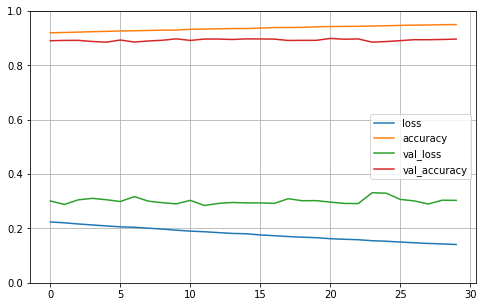

In [60]:
#after two iterations of training!! (calling fit function twice)
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [79]:
# Now let's predict! 
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

1/1 [==============================] - 0s 21ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [80]:
import numpy as np
y_pred_probabilities = model.predict(X_new)
y_pred_classes = np.argmax(y_pred_probabilities, axis=-1)


1/1 [==============================] - 0s 22ms/step


In [67]:
y_pred_classes

array([9, 2, 1])

In [68]:
np.array(class_names)[y_pred_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')